In [114]:
# Download a youtube video (Chinese)
# https://github.com/slhck/ffmpeg-normalize

from pytube import YouTube


chineseVideos = ['LfMoOjztz9A', 'z5OGUEbz5vA', 
                 'n5T4w5Cv684', 'dhamGcr8d4Q', 
                 'b3n7-4JlUSU', 'Q6xnz1sl9fc', 
                 'XWgvvq6-8no', 'fN6kNbz8JKo']

englishVideos = ['w-Nwy758gBo', 'RsOpnFbufcY', 
                 'qJ1rdVEcl5g', '-oIIZJeVGpc', 
                 'G3ZY6L-SXy0', 'ycPr5-27vSI']

def downloadVideos(videos):
    yt = YouTube('http://youtube.com/watch?v=w-Nwy758gBo')
    yt.streams.filter(only_audio=True, subtype='mp4').first().download()
    
downloadVideos([])
    

KeyboardInterrupt: 

In [188]:
from pathlib import Path
chineseAudioPath = Path('./data/audioFilesChinese')
englishAudioPath = Path('./data/audioFilesEnglish')


chineseAudioFiles = [ {'path': chineseAudioPath/'sample2.mp4', 'prefix': 'twvlog'},
                      {'path': chineseAudioPath/'sample3.mp3', 'prefix': 'podcast'},
                      {'path': chineseAudioPath/'sample4.mp3', 'prefix': 'podcast2'},
                      {'path': chineseAudioPath/'sample5.mp3', 'prefix': 'mainlanderBros'},
                      {'path': chineseAudioPath/'sample6.mp3', 'prefix': 'jawawabro'}
                    ]

englishAudioFiles = [ {'path': englishAudioPath/'sample1.mp3', 'prefix': 'dndvlog'},
                     {'path': englishAudioPath/'sample2.mp3', 'prefix': 'sirajlady'},
                     {'path': englishAudioPath/'sample3.mp3', 'prefix': 'sirajguy'},
                     {'path': englishAudioPath/'sample4.mp3', 'prefix': 'dndexplained'},
                     {'path': englishAudioPath/'sample5.mp3', 'prefix': 'pewdapology'},
                     {'path': englishAudioPath/'sample6.mp3', 'prefix': 'codetalk'}
                    ]

clipChinesePath = Path('./data/clipsChinese')
clipEnglishPath = Path('./data/clipsEnglish')

spectrogramsChinese = Path('./data/spectrogramsChinese')
spectrogramsEnglish = Path('./data/spectrogramsEnglish')


In [167]:
import shutil
shutil.rmtree(clipChinesePath.resolve())
shutil.rmtree(clipEnglishPath.resolve())
shutil.rmtree(spectrogramsChinese.resolve())
shutil.rmtree(spectrogramsEnglish.resolve())

clipChinesePath.mkdir(parents=True, exist_ok=True)
clipEnglishPath.mkdir(parents=True, exist_ok=True)
spectrogramsChinese.mkdir(parents=True, exist_ok=True)
spectrogramsEnglish.mkdir(parents=True, exist_ok=True)

In [168]:
import os
from pydub import AudioSegment
from pydub.utils import get_array_type

# ffmpeg -i WaltAndBryanSpeakingChinese.m4a -acodec pcm_s16le -ar 44100 WaltAndBryanSpeakingChinese.wav
# ffmpeg mono channel
# -ac 1

def generate5SecondClips(audioFile, clipPath, prefix):
    
    fullFilePath = str(audioFile.resolve())
    outFileName = str(audioFile.resolve()).rsplit('/')[-1] + ".wav"
    command = "ffmpeg -i {0} -acodec pcm_s16le -ar 44100 -af 'volume=8dB' -ac 1 /tmp/{1}".format(fullFilePath, outFileName)
    print(command)
    os.system(command)
    
    sound = AudioSegment.from_file('/tmp/' + outFileName)
    sound.set_channels(1)
    sound.set_sample_width(1)
    sound.set_frame_rate(44100)
    
    position = 10000
    writeCount = 0
    
    while position + 5000 < len(sound) and writeCount < 30:
        position += 5000
        positionEnd = position + 5000
        startSecs = str(int(position / 1000))
        endSecs = str(int((position + 5000) / 1000))
        clip = sound[position:positionEnd]
        filename = prefix + "-" + startSecs + "-" + endSecs + ".wav"
        clip.export(clipPath/filename, format="wav", bitrate="1411k")
        writeCount += 1
        
    print("Wrote " + str(writeCount) + " clips")

# tmpFilePath = Path('/tmp/audfiles')
# generate5SecondClips(chineseAudioPath/'sample1.mp4', tmpFilePath, 'testfile')

In [169]:
for file in chineseAudioFiles:
    generate5SecondClips(file['path'], clipChinesePath, file['prefix'])



ffmpeg -i /Users/schlendeus/Desktop/ChineseBusyBody/audioFilesChinese/sample2.mp4 -acodec pcm_s16le -ar 44100 -af 'volume=8dB' -ac 1 /tmp/sample2.mp4.wav
Wrote 30 clips
ffmpeg -i /Users/schlendeus/Desktop/ChineseBusyBody/audioFilesChinese/sample3.mp3 -acodec pcm_s16le -ar 44100 -af 'volume=8dB' -ac 1 /tmp/sample3.mp3.wav
Wrote 30 clips
ffmpeg -i /Users/schlendeus/Desktop/ChineseBusyBody/audioFilesChinese/sample4.mp3 -acodec pcm_s16le -ar 44100 -af 'volume=8dB' -ac 1 /tmp/sample4.mp3.wav
Wrote 30 clips
ffmpeg -i /Users/schlendeus/Desktop/ChineseBusyBody/audioFilesChinese/sample5.mp3 -acodec pcm_s16le -ar 44100 -af 'volume=8dB' -ac 1 /tmp/sample5.mp3.wav
Wrote 17 clips
ffmpeg -i /Users/schlendeus/Desktop/ChineseBusyBody/audioFilesChinese/sample6.mp3 -acodec pcm_s16le -ar 44100 -af 'volume=8dB' -ac 1 /tmp/sample6.mp3.wav
Wrote 30 clips


In [170]:
for file in englishAudioFiles:
    generate5SecondClips(file['path'], clipEnglishPath, file['prefix'])

ffmpeg -i /Users/schlendeus/Desktop/ChineseBusyBody/audioFilesEnglish/sample1.mp3 -acodec pcm_s16le -ar 44100 -af 'volume=8dB' -ac 1 /tmp/sample1.mp3.wav
Wrote 30 clips
ffmpeg -i /Users/schlendeus/Desktop/ChineseBusyBody/audioFilesEnglish/sample2.mp3 -acodec pcm_s16le -ar 44100 -af 'volume=8dB' -ac 1 /tmp/sample2.mp3.wav
Wrote 30 clips
ffmpeg -i /Users/schlendeus/Desktop/ChineseBusyBody/audioFilesEnglish/sample3.mp3 -acodec pcm_s16le -ar 44100 -af 'volume=8dB' -ac 1 /tmp/sample3.mp3.wav
Wrote 30 clips
ffmpeg -i /Users/schlendeus/Desktop/ChineseBusyBody/audioFilesEnglish/sample4.mp3 -acodec pcm_s16le -ar 44100 -af 'volume=8dB' -ac 1 /tmp/sample4.mp3.wav
Wrote 30 clips
ffmpeg -i /Users/schlendeus/Desktop/ChineseBusyBody/audioFilesEnglish/sample5.mp3 -acodec pcm_s16le -ar 44100 -af 'volume=8dB' -ac 1 /tmp/sample5.mp3.wav
Wrote 17 clips
ffmpeg -i /Users/schlendeus/Desktop/ChineseBusyBody/audioFilesEnglish/sample6.mp3 -acodec pcm_s16le -ar 44100 -af 'volume=8dB' -ac 1 /tmp/sample6.mp3.wav
W

In [186]:
import os
import wave
import pylab

# https://courses.engr.illinois.edu/ece590sip/sp2018/spectrograms1_wideband_narrowband.html

def graphSpectrogram(destFolder, wavFile, plot=False):
    sound_info, frame_rate = getWavInfo(wavFile)
    pylab.figure(num=None, figsize=(12, 12))
    pylab.specgram(sound_info, Fs=44100)
    outfile = os.path.splitext(wavFile)[0].rsplit('/', 1)[-1]
    print(outfile)
    pylab.savefig(destFolder + '/' + outfile)
    if plot == False:
        pylab.close()


def getWavInfo(wavFile):
    wav = wave.open(wavFile, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'Int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate





In [172]:
from os import listdir
from os.path import isfile, join

files = listdir("clipsChinese")
for file in files:
    graphSpectrogram("spectrogramsChinese", "clipsChinese/" + file)

podcast-35-40


/Users/schlendeus/Desktop/ChineseBusyBody/venv/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/Users/schlendeus/Desktop/ChineseBusyBody/venv/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


podcast2-110-115
podcast2-75-80
podcast2-160-165
podcast-65-70
jawawabro-125-130
mainlanderBros-25-30
mainlanderBros-85-90
twvlog-145-150
mainlanderBros-40-45
mainlanderBros-50-55
twvlog-15-20
jawawabro-75-80
podcast2-70-75
twvlog-65-70
jawawabro-145-150
twvlog-125-130
twvlog-35-40
podcast-135-140
podcast2-60-65
mainlanderBros-55-60
jawawabro-60-65
podcast-15-20
podcast-105-110
jawawabro-70-75
podcast2-100-105
podcast2-115-120
podcast2-120-125
mainlanderBros-65-70
podcast-125-130
twvlog-135-140
podcast2-150-155
twvlog-55-60
mainlanderBros-35-40
podcast-50-55
twvlog-105-110
podcast-40-45
podcast-85-90
podcast-25-30
jawawabro-20-25
podcast-55-60
jawawabro-80-85
jawawabro-45-50
jawawabro-30-35
jawawabro-105-110
jawawabro-90-95
podcast2-155-160
twvlog-40-45
podcast-145-150
podcast2-30-35
twvlog-25-30
podcast2-90-95
twvlog-85-90
podcast2-140-145
podcast2-20-25
mainlanderBros-15-20
podcast2-130-135
podcast2-80-85
podcast2-45-50
jawawabro-135-140
twvlog-50-55
podcast2-145-150
podcast2-25-30
t

In [173]:
from os import listdir
from os.path import isfile, join

files = listdir("clipsEnglish")
for file in files:
    graphSpectrogram("data/spectrogramsEnglish", "data/clipsEnglish/" + file)

/Users/schlendeus/Desktop/ChineseBusyBody/venv/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/Users/schlendeus/Desktop/ChineseBusyBody/venv/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


sirajguy-90-95
sirajguy-30-35
pewdapology-55-60
sirajlady-70-75
dndexplained-35-40
codetalk-125-130
sirajguy-45-50
sirajlady-60-65
dndexplained-65-70
sirajguy-80-85
sirajguy-95-100
sirajguy-20-25
sirajguy-125-130
sirajlady-155-160
dndvlog-150-155
codetalk-15-20
sirajlady-140-145
sirajlady-130-135
dndvlog-120-125
dndvlog-75-80
codetalk-35-40
dndexplained-135-140
sirajguy-145-150
sirajlady-75-80
dndvlog-130-135
sirajlady-120-125
codetalk-65-70
sirajlady-150-155
dndvlog-140-145
dndvlog-155-160
dndexplained-15-20
pewdapology-50-55
dndexplained-105-110
dndvlog-60-65
codetalk-145-150
pewdapology-25-30
dndvlog-70-75
pewdapology-85-90
sirajlady-95-100
pewdapology-40-45
codetalk-55-60
dndexplained-125-130
pewdapology-95-100
pewdapology-15-20
sirajlady-30-35
dndexplained-50-55
sirajlady-90-95
dndvlog-160-165
sirajguy-70-75
dndvlog-110-115
dndexplained-25-30
sirajlady-100-105
sirajlady-45-50
dndexplained-85-90
sirajguy-60-65
sirajlady-20-25
sirajlady-115-120
sirajlady-80-85
dndexplained-40-45
dnd

In [175]:
# Generating test files
# Walt's voice

actualTestPath = Path('.data/actualTests')
actualTestPathFile = actualTestPath/'WaltSpeakingEnglish.m4a'
outputClips = actualTestPath/'outputClips'
outputSpecs = actualTestPath/'outputSpectrograms'


generate5SecondClips(actualTestPathFile, outputClips, 'waltenglish')

ffmpeg -i /Users/schlendeus/Desktop/ChineseBusyBody/actualTests/WaltSpeakingEnglish.m4a -acodec pcm_s16le -ar 44100 -af 'volume=8dB' -ac 1 /tmp/WaltSpeakingEnglish.m4a.wav
Wrote 0 clips


In [176]:
actualTestPathFile = actualTestPath/'WaltAndBryanSpeakingChinese.m4a'

generate5SecondClips(actualTestPathFile, outputClips, 'waltbryanchinese')

ffmpeg -i /Users/schlendeus/Desktop/ChineseBusyBody/actualTests/WaltAndBryanSpeakingChinese.m4a -acodec pcm_s16le -ar 44100 -af 'volume=8dB' -ac 1 /tmp/WaltAndBryanSpeakingChinese.m4a.wav
Wrote 0 clips


/Users/schlendeus/Desktop/ChineseBusyBody/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/Users/schlendeus/Desktop/ChineseBusyBody/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


waltbryanchinese-0-5
waltenglish-5-10
waltbryanchinese-5-10
waltbryanchinese-10-15
waltenglish-0-5


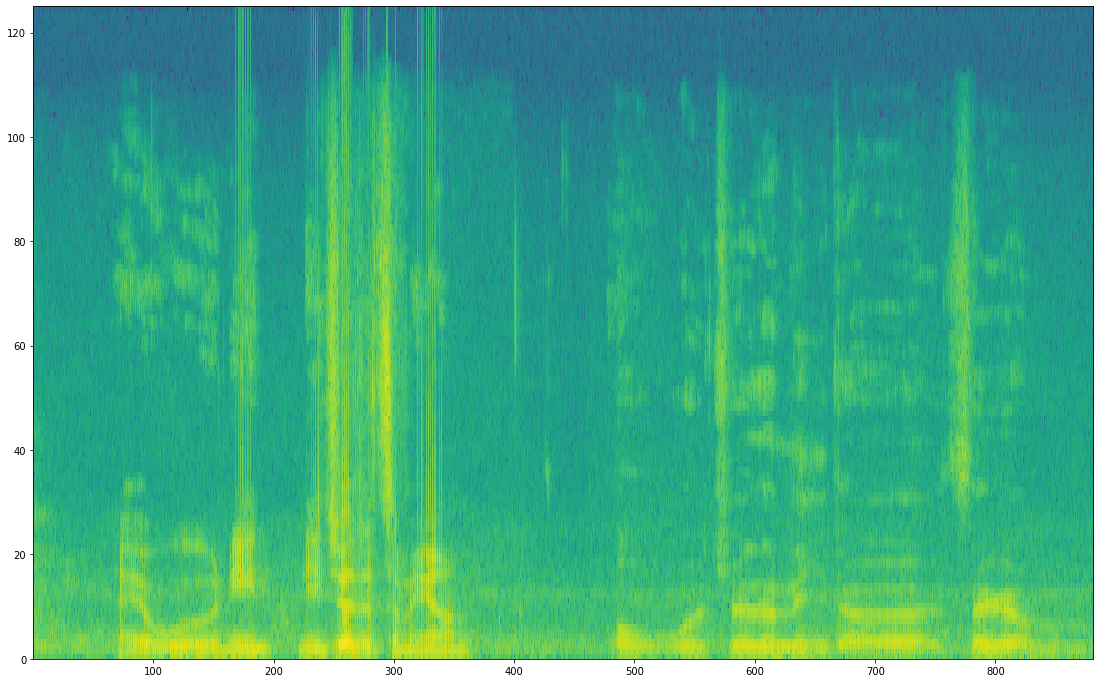

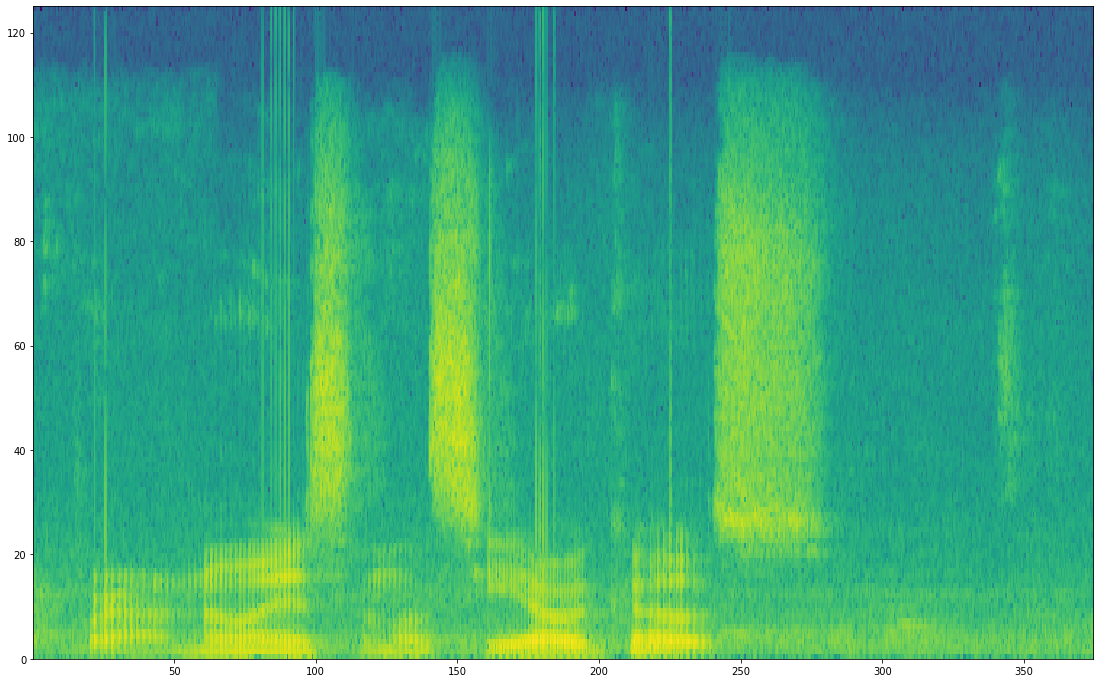

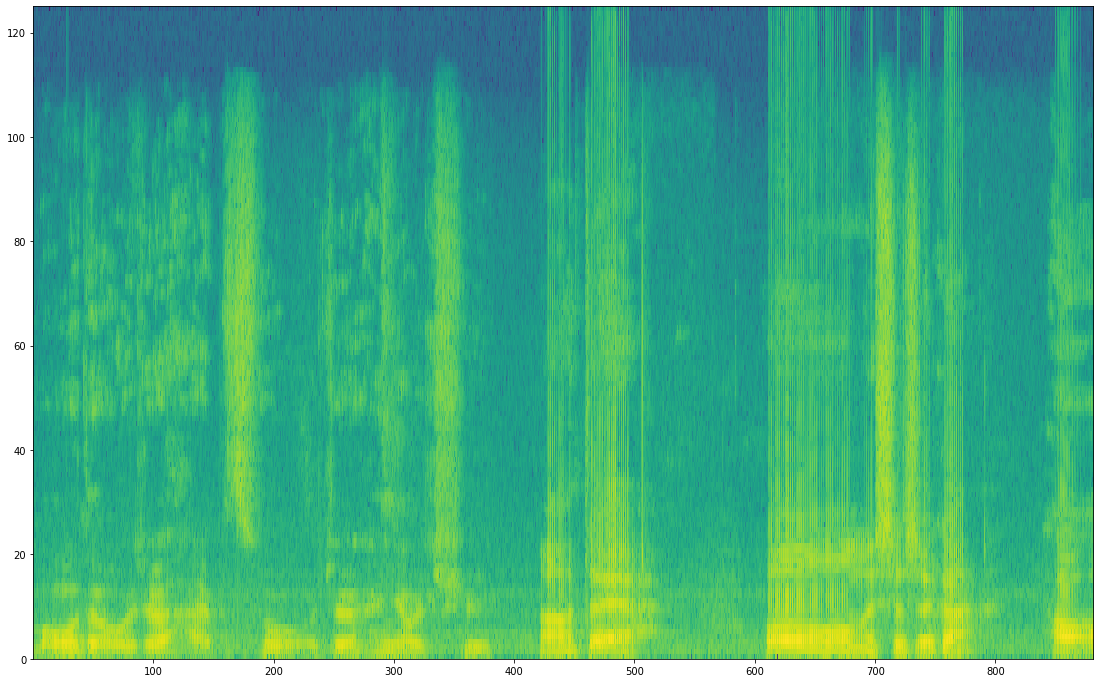

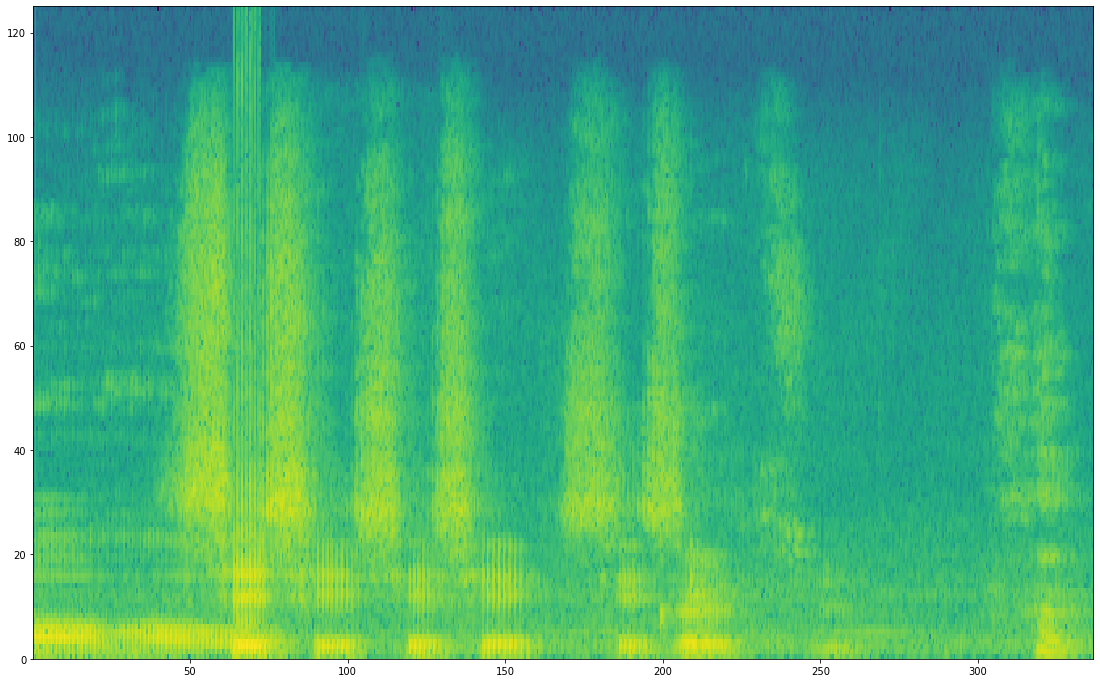

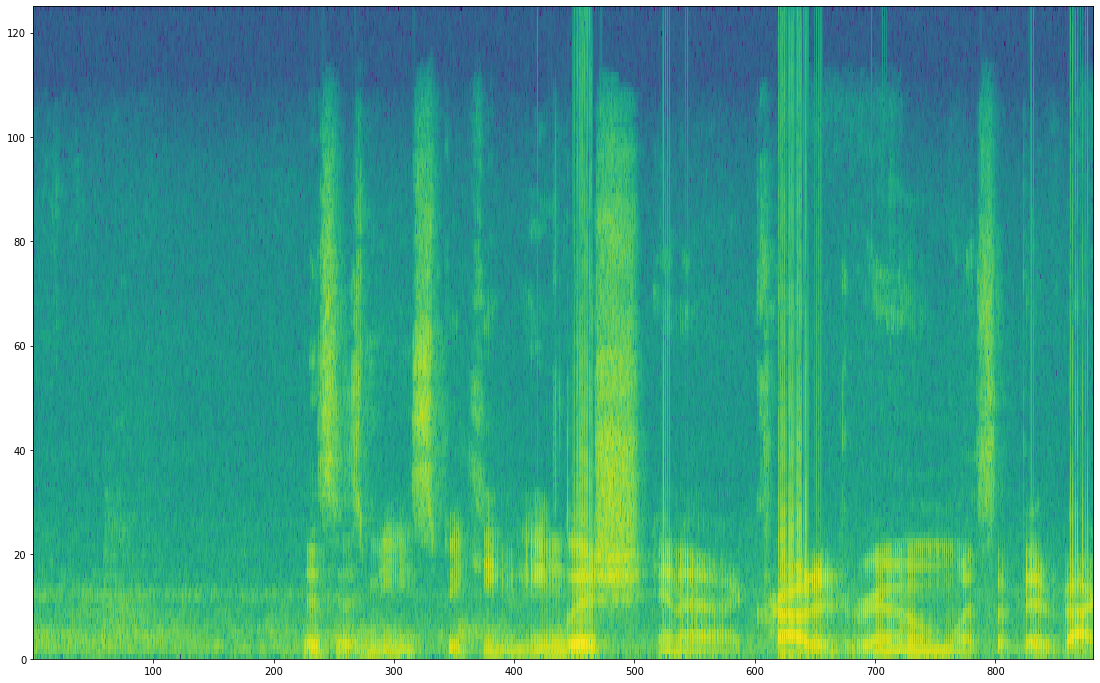

In [187]:
files = listdir("actualTests/outputClips")
files
for file in files:
    graphSpectrogram("actualTests/outputSpectrograms", "actualTests/outputClips/" + file, plot=True)